## Linear Regression Tutorial

In [ ]:
#Import Statments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression

In [2]:
#Scratch Pad

np.random.seed(42)
num_samples = 500

years_of_exp = np.random.randint(2,21, size=num_samples)
slope = (200_000 - 60_000)/18
intercept = 60_000

salaries = slope * years_of_exp + intercept + np.random.normal(0,10_000,size=num_samples)

data = {'Years_of_Exp':years_of_exp,'Salary':salaries}
df = pd.DataFrame(data)


In [3]:
df.describe()

,Years_of_Exp,Salary
count,500.000000,500.000000
mean,10.616000,142570.011096
std,5.662922,44935.263058
min,2.000000,54881.134555
25%,5.750000,104426.300731
50%,10.000000,139865.032545
75%,16.000000,182341.125962
max,20.000000,241879.376204


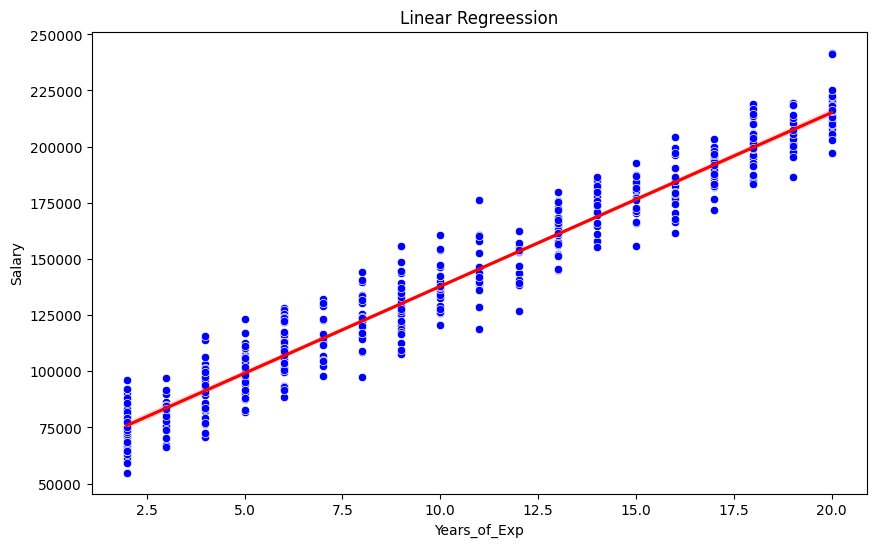

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Years_of_Exp",y="Salary",data=df,color="blue")
sns.regplot(x="Years_of_Exp",y="Salary",data=df,scatter=False,color="red")
plt.xlabel('Years_of_Exp')
plt.ylabel('Salary')
plt.title('Linear Regreession')

plt.show()

In [5]:
X = df[['Years_of_Exp']]
y = df['Salary']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=315)

In [6]:
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
lr.score(X_train,y_train)

0.9512637045874885

In [8]:
lr.score(X_test,y_test)

0.9481222630776689

In [9]:
y_pred = lr.predict(X_test)

mean_absolute_error(y_test,y_pred)

8035.152854438271

In [10]:
mean_squared_error(y_test,y_pred)

102012346.94162089

In [11]:
r2_score(y_test,y_pred)

0.9481222630776689

In [12]:
print(lr.coef_)
print(lr.intercept_)

[7708.89826345]
60476.29552387251


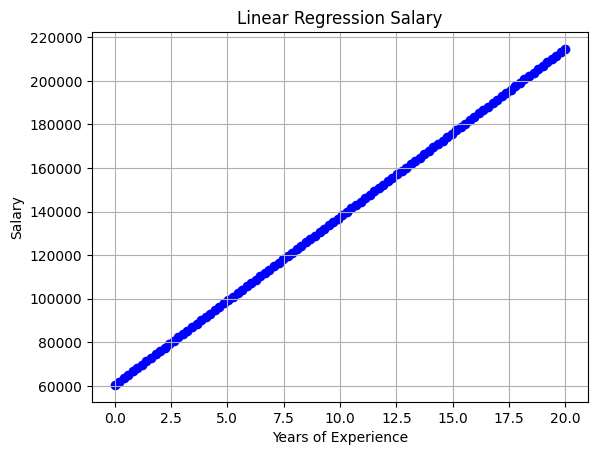

In [13]:
coeff = lr.coef_
intcept = lr.intercept_

X = np.linspace(0,20,100)
y = coeff * X + intcept

plt.scatter(X,y, label=f'y={coeff[0]}x + {intcept}',color="blue")
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.title("Linear Regression Salary")
plt.grid()
plt.show()